In [30]:
import tensorflow as tf
from __future__ import division, print_function, absolute_import
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [31]:
from tensorflow.examples.tutorials.mnist import input_data
fmnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


In [32]:
#np.random.seed(134) 
#tf.set_random_seed(34)

In [33]:
num_steps=150000 #No of times generator/discriminator is updated before it moves onto discriminator/generator?
learning_rate=0.0002
batch_size=128 #So that you don't have to load all your data at once

#Network Parameters
image_dim=784
gen_hnode_dim=800
dis_hnode_dim=800
noise_dim=100

#Initializing the weight parameters:
# A custom initialization (see Xavier Glorot init)
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

drop_out_rate=tf.placeholder(tf.float32)
gen_input = tf.placeholder(tf.float32, shape=[None, noise_dim], name='input_noise')
disc_input = tf.placeholder(tf.float32, shape=[None, image_dim], name='disc_input')

In [34]:
#Defining in a way to avoid extra code

weights={'gen_ilayer':tf.Variable(glorot_init([noise_dim,gen_hnode_dim])),
         'gen_olayer':tf.Variable(glorot_init([gen_hnode_dim,image_dim])),
         'dis_ilayer':tf.Variable(glorot_init([image_dim,dis_hnode_dim])),
         'dis_olayer':tf.Variable(glorot_init([dis_hnode_dim,1]))}
biases={'gen_ilayer':tf.Variable(tf.zeros([gen_hnode_dim])),
         'gen_olayer':tf.Variable(tf.zeros([image_dim])),
         'dis_ilayer':tf.Variable(tf.zeros([dis_hnode_dim])),
         'dis_olayer':tf.Variable(tf.zeros([1]))}

In [35]:
def generator(data,dropout_rate):       
    l1=tf.add(tf.matmul(data,weights['gen_ilayer']),biases['gen_ilayer'])
    l1rel=tf.nn.relu(l1)    
    l1drop = tf.keras.layers.Dropout(dropout_rate, noise_shape=None, seed=None)(l1rel,training=True)
    l2=tf.add(tf.matmul(l1drop,weights['gen_olayer']),biases['gen_olayer'])
    output = tf.nn.tanh(l2)
    return output,l2
    

In [36]:
def discriminator(data,dropout_rate,seed):
    l1=tf.add(tf.matmul(data,weights['dis_ilayer']),biases['dis_ilayer'])
    l1rel=tf.nn.relu(l1)
    #l1drop = tf.keras.layers.Dropout(dropout_rate, noise_shape=None, seed=seed)(l1rel)
    l2=tf.add(tf.matmul(l1rel,weights['dis_olayer']),biases['dis_olayer'])
    output = tf.nn.sigmoid(l2)
    return output,l2

In [37]:
gen_sample,manifold=generator(gen_input,drop_out_rate)
seed=np.random.randint(5,1000)
disc_real,disreal_manifold=discriminator(disc_input,drop_out_rate,seed)
disc_fake, disfake_manifold=discriminator(gen_sample,drop_out_rate,seed)

beta=0.01
regularizers_gen = tf.nn.l2_loss(weights['gen_olayer']) + tf.nn.l2_loss(weights['gen_ilayer'])
regularizers_dis = tf.nn.l2_loss(weights['dis_olayer']) + tf.nn.l2_loss(weights['dis_ilayer'])

# Build Loss
gen_loss = -tf.reduce_mean(tf.log(disc_fake))
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1. - disc_fake))

#Add L2/Weight Decay regularization
gen_loss = tf.reduce_mean(gen_loss + beta * regularizers_gen)
disc_loss = tf.reduce_mean(disc_loss + beta * regularizers_dis)

#Building optimizer for generator and discriminator
optimizer_gen = tf.train.AdamOptimizer(learning_rate=learning_rate)
optimizer_disc = tf.train.AdamOptimizer(learning_rate=learning_rate)

generator_var=[weights['gen_ilayer'],weights['gen_olayer'],
               biases['gen_ilayer'],biases['gen_olayer']]

discriminator_var=[weights['dis_ilayer'],weights['dis_olayer'],
               biases['dis_ilayer'],biases['dis_olayer']]
train_gen=optimizer_gen.minimize(gen_loss,var_list=generator_var)
train_dis=optimizer_disc.minimize(disc_loss,var_list=discriminator_var)
#extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
init = tf.global_variables_initializer()
       

In [38]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

Step 0: Generator Loss: 16.202570, Discriminator Loss: 10.066115


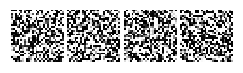

Step 1: Generator Loss: 16.134912, Discriminator Loss: 10.054366


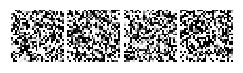

Step 4000: Generator Loss: 4.606684, Discriminator Loss: 0.621830


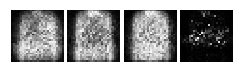

Step 8000: Generator Loss: 3.254048, Discriminator Loss: 0.898333


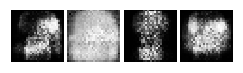

Step 12000: Generator Loss: 2.514665, Discriminator Loss: 0.929597


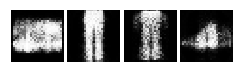

Step 16000: Generator Loss: 3.018210, Discriminator Loss: 0.881899


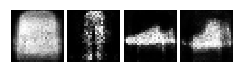

Step 20000: Generator Loss: 2.629494, Discriminator Loss: 1.009633


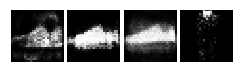

Step 24000: Generator Loss: 2.989290, Discriminator Loss: 0.904330


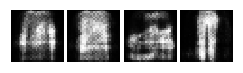

Step 28000: Generator Loss: 3.724157, Discriminator Loss: 0.767358


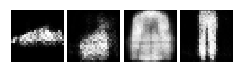

Step 32000: Generator Loss: 3.334093, Discriminator Loss: 0.798742


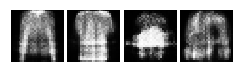

Step 36000: Generator Loss: 3.111258, Discriminator Loss: 0.816770


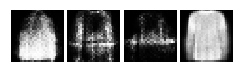

Step 40000: Generator Loss: 2.892667, Discriminator Loss: 0.873635


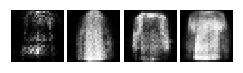

Step 44000: Generator Loss: 2.847480, Discriminator Loss: 0.844754


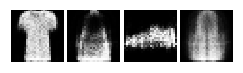

Step 48000: Generator Loss: 3.143749, Discriminator Loss: 0.838736


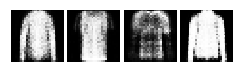

Step 52000: Generator Loss: 3.455213, Discriminator Loss: 0.780410


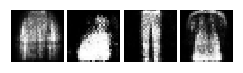

Step 56000: Generator Loss: 3.801091, Discriminator Loss: 0.903958


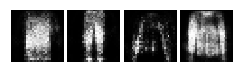

Step 60000: Generator Loss: 3.502003, Discriminator Loss: 1.046138


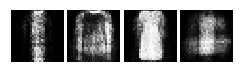

Step 64000: Generator Loss: 3.080384, Discriminator Loss: 0.846473


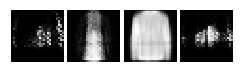

Step 68000: Generator Loss: 3.538789, Discriminator Loss: 0.836939


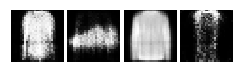

Step 72000: Generator Loss: 2.423065, Discriminator Loss: 0.929294


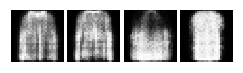

Step 76000: Generator Loss: 3.188130, Discriminator Loss: 0.799668


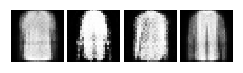

Step 80000: Generator Loss: 2.865054, Discriminator Loss: 0.841780


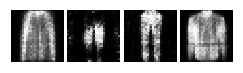

Step 84000: Generator Loss: 3.291936, Discriminator Loss: 0.892681


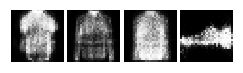

Step 88000: Generator Loss: 3.006493, Discriminator Loss: 0.803844


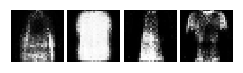

Step 92000: Generator Loss: 3.092176, Discriminator Loss: 0.884831


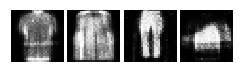

Step 96000: Generator Loss: 2.622112, Discriminator Loss: 0.880786


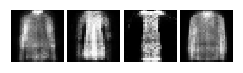

Step 100000: Generator Loss: 3.102571, Discriminator Loss: 0.808532


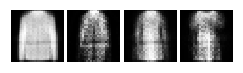

Step 104000: Generator Loss: 3.229655, Discriminator Loss: 0.841995


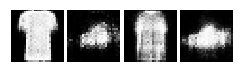

Step 108000: Generator Loss: 3.343444, Discriminator Loss: 0.817830


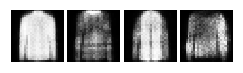

Step 112000: Generator Loss: 3.179041, Discriminator Loss: 0.879696


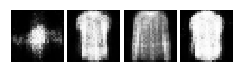

Step 116000: Generator Loss: 3.561506, Discriminator Loss: 0.875908


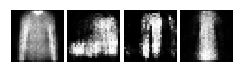

Step 120000: Generator Loss: 2.878067, Discriminator Loss: 0.798811


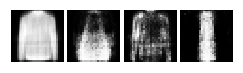

Step 124000: Generator Loss: 3.116740, Discriminator Loss: 0.917066


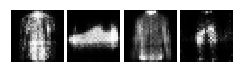

Step 128000: Generator Loss: 3.082548, Discriminator Loss: 0.809052


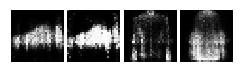

Step 132000: Generator Loss: 3.031799, Discriminator Loss: 0.853871


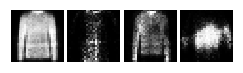

Step 136000: Generator Loss: 3.029091, Discriminator Loss: 0.855420


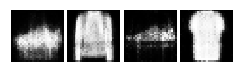

Step 140000: Generator Loss: 3.177592, Discriminator Loss: 0.936986


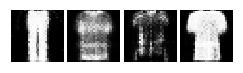

Step 144000: Generator Loss: 3.068037, Discriminator Loss: 0.863130


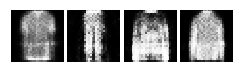

Step 148000: Generator Loss: 3.259234, Discriminator Loss: 0.962289


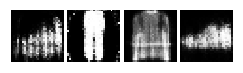

In [42]:
config = tf.ConfigProto(device_count = {'GPU': 1})
sess = tf.Session(config=config)

#with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
sess.run(init)
keras.backend.set_learning_phase(True)
for i in range(num_steps):
    batch_x, _ = fmnist.train.next_batch(batch_size)
    batch_x = batch_x * 2. - 1.
    z = np.random.normal(0., 1., size=[batch_size, noise_dim])    
    _, gl = sess.run([train_gen, gen_loss], feed_dict={gen_input:z, drop_out_rate:0.75})
    _, dl = sess.run([train_dis, disc_loss], feed_dict={disc_input: batch_x, gen_input:z, drop_out_rate:0.75})
    
    if i % 4000 == 0 or i == 1:
        print('Step %i: Generator Loss: %f, Discriminator Loss: %f' % (i, gl, dl))
        z=np.random.normal(0., 1., size=[4, noise_dim])
        samples1,manifold1 = sess.run([gen_sample,manifold], feed_dict={gen_input: z,drop_out_rate:0.75})
        samples2,manifold2 = sess.run([gen_sample,manifold], feed_dict={gen_input: z,drop_out_rate:0.75})
        samples1 = (samples1 + 1.) / 2.
        samples2 = (samples2 + 1.) / 2.
        fig = plot(samples1)
        plt.show()

True


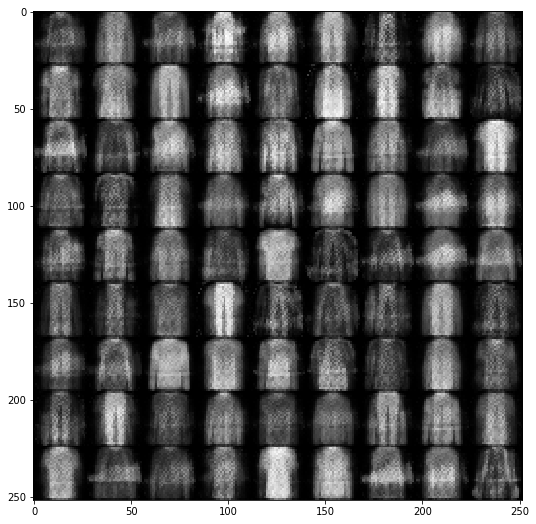

In [46]:
n = 9
averaging_over=10
arr=[]
canvas = np.empty((28 * n, 28 * n))
canvas1 = np.empty((averaging_over,28 * n, 28 * n))
for i in range(n):
    arr=[]
    z = np.random.normal(0., 1., size=[n, noise_dim])
    keras.backend.set_learning_phase(True)
    samples1,manifold1 = sess.run([gen_sample,manifold], feed_dict={gen_input: z,drop_out_rate:0.75})
    samples1 = (samples1 + 1.) / 2. 
    for j in range(averaging_over):
        keras.backend.set_learning_phase(True)
        samples2,manifold2 = sess.run([gen_sample,manifold], feed_dict={gen_input: z,drop_out_rate:0.75})
        samples2 = (samples2 + 1.) / 2. 
        arr.append(samples2)
        samples1+= samples2
    g=samples1/(averaging_over+1.)           
    for j in range(n):
        canvas[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28]) 

    for k in range(averaging_over):
        a=arr[k]
        for j in range(n):
            canvas1[k,i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = a[j].reshape([28, 28])    
print(keras.backend.learning_phase())
plt.figure(figsize=(n, n))
plt.imshow(canvas, origin="upper", cmap="gray")
plt.imsave('fmnist_std_dropout_w1.png',canvas,cmap="gray")

for k in range(averaging_over):
    plt.imsave('fmnist_std_dropout_{}.png'.format(k),canvas1[k],cmap="gray")

plt.show()